# Exploring and Preparing Land Prices Data by Census Tract 

[Data Source](https://www.fhfa.gov/PolicyProgramsResearch/Research/Pages/wp1901.aspx)


[FAQs](https://www.fhfa.gov/PolicyProgramsResearch/Research/PaperDocuments/FAQs-Land-10-28-20.pdf)

In this notebook, I will prepare our land values data for use in our decision tree for our random forest evaluation. I will filter down to the census tracts within the areas we are interested in, I will clean the data and look for NAs and duplicates, I will join the data to census tract boundaries, and I will prepare the data to be spatially joined to the parcel level SCAG data. 

First: Look at Census Tract level land values data, this dataset has residential data only. 

In [3]:
import pandas as pd
import geopandas as gpd

rivgeom = gpd.read_file('data/riversidegeom/Udsparcels.shp')

KeyboardInterrupt: 

In [13]:
rivgeom.head()

,APN,FLAG,MAIL_STREE,MAIL_CITY,SITUS_STRE,SITUS_CITY,STREET_NUM,STREET_PRE,STREET_NAM,STREET_TYP,...,BLOCK,CAME_FROM,TAX_RATE_A,LAND,STRUCTURES,PRIMARY_OW,ALL_OWNER_,Shape_Leng,Shape_Area,geometry
0,727271026,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,750.928966,20576.810542,"POLYGON ((6614112.612 2150594.430, 6614159.734..."
1,779201018,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,269.157285,3783.144844,"POLYGON ((6570999.526 2188909.899, 6570971.279..."
2,182084014,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1118.738635,8969.624746,"POLYGON ((6204064.073 2310041.573, 6204067.037..."
3,290080018,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1294.601223,97648.076503,"POLYGON ((6196599.470 2223714.710, 6196589.146..."
4,300090005,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,3208.975260,559323.813624,"POLYGON ((6272976.191 2246330.019, 6272976.353..."


In [15]:
col = ['APN', 'LAND']
riv = rivgeom[col]
riv.head()

,APN,LAND
0,727271026,0.0
1,779201018,0.0
2,182084014,0.0
3,290080018,0.0
4,300090005,0.0


In [4]:
#filter down to counties of interest
socal = alldf[(alldf.County == 'Riverside County')|(alldf.County == 'San Bernardino County')]

,State,County,Census Tract,"Land Value\n(1/4 Acre Lot, Standardized)","Land Value\n(Per Acre, As-Is)",Land Share of Property Value,Lot Size,Interior Square Feet,Property Value (Standardized),Property Value (As-is)
3248,California,Los Angeles County,6037501900,318700,1832100,0.627,6460,1290,621000,433300
2500,California,Los Angeles County,6037101300,406500,1826100,0.621,8890,1580,733100,599700
3240,California,Los Angeles County,6037500600,287400,1777100,0.612,5740,1260,572400,383100
2862,California,Los Angeles County,6037262400,2146700,5212500,0.747,21460,3610,2261300,3439000
4457,California,Riverside County,6065041702,192400,887700,0.539,8800,1290,450500,332600
3612,California,Los Angeles County,6037910603,55300,294900,0.218,7120,1600,270800,221500
3058,California,Los Angeles County,6037403402,480800,2291800,0.671,8400,1870,731100,658500
2872,California,Los Angeles County,6037265201,2231000,9977600,0.754,9170,3350,2221800,2784400
3456,California,Los Angeles County,6037620522,951600,5036700,0.747,7210,2260,1150100,1116100
3587,California,Los Angeles County,6037901011,61200,285400,0.212,8410,1960,278800,260000


In [1]:
import geopandas as gpd

tracts = gpd.read_file('data/tl_2019_06_tract/tl_2019_06_tract.shp')
tracts.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [2]:
tracts['GEOID'] = tracts['GEOID'].astype('float')

In [7]:
socal = socal.rename(columns = {'Census Tract':'GEOID'})
socal['GEOID'] = socal['GEOID'].astype('float')
socal = socal.set_index('GEOID')

In [8]:
tracts = tracts.set_index('GEOID')

In [9]:
socal.shape

(1889, 9)

In [11]:
socalGdf = socal.join(tracts[['geometry']], on= 'GEOID')
socalGdf.sample(3)
socalGdf.head()

,State,County,"Land Value\n(1/4 Acre Lot, Standardized)","Land Value\n(Per Acre, As-Is)",Land Share of Property Value,Lot Size,Interior Square Feet,Property Value (Standardized),Property Value (As-is),geometry
GEOID,,,,,,,,,,
6.037101e+09,California,Los Angeles County,325200,1722700,0.568,7100,1400,668000,494500,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
6.037101e+09,California,Los Angeles County,327100,1233000,0.538,11340,1850,652600,596600,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
6.037101e+09,California,Los Angeles County,302800,1467400,0.503,7840,1600,660200,525100,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
6.037101e+09,California,Los Angeles County,325600,1684900,0.554,7170,1400,683800,500800,"POLYGON ((-118.28592 34.25227, -118.28592 34.2..."
6.037101e+09,California,Los Angeles County,406500,1826100,0.621,8890,1580,733100,599700,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


# Parcel Level Data

Now, instead try the parcel level. Data source: https://gis.rivco.org/pages/data-distribution (Parcels Attributed) 2021

In [13]:
import pandas as pd

#riverside = pd.read_csv('riv_parcels_values.csv')
827053

C:\Users\LucyBriggs\AppData\Local\Temp\ipykernel_11788\449641197.py:3: DtypeWarning: Columns (5,6,8,9,10,11,12,13,14,23,26) have mixed types. Specify dtype option on import or set low_memory=False.
  riverside = pd.read_csv('riv_parcels_values.csv')


In [17]:
riv.shape

(827053, 35)

In [4]:
riv.columns
riv = riv.dropna()
riv['APN'].is_unique
riv = riv[riv.LAND!=0]
cols = ['APN', 'geometry']
rivgeom2 = rivgeom[cols]
rivgeom2['APN'] = rivgeom2['APN'].astype('int64')
riv['APN'] = riv['APN'].astype('int64')
rivfinal = riv.join(rivgeom2.set_index('APN'), on = 'APN', how = 'left').reset_index()
rivGdf = gpd.GeoDataFrame(rivfinal, geometry='geometry')

NameError: name 'riv' is not defined

In [3]:
rivtest = riv[['156030029']]

NameError: name 'riv' is not defined

In [1]:
rivtest

NameError: name 'rivtest' is not defined

<Axes: >

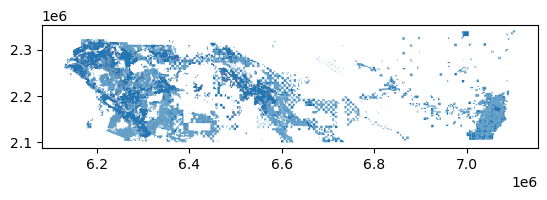

In [19]:
rivGdf.plot()

In [ ]:
rivGdf.to_file("riversideparcels/riversideparcels.shp", driver = 'ESRI Shapefile')

In [14]:
desired_cols = ['APN', 'LAND','SHAPE_Length', 'SHAPE_Area']
riverside = riverside[desired_cols]
riverside = riverside.dropna()
riverside.head()

,APN,ACREAGE,LOT_TYPE,CLASS_CODE,LAND,SHAPE_Length,SHAPE_Area
349,101160001,1.37,Lot,Vacant Land - Predominate Agricultural Use,1612.0,1034.716993,63941.295998
356,101200001,0.26,Lot,HOMESITE/< 1 ACRE,33813.0,482.028560,11167.476229
357,101200010,0.21,Lot,Vacant Land - Predominate Agricultural Use,4751.0,429.474623,9283.691471
358,101200011,0.21,Lot,HOMESITE/< 1 ACRE,7803.0,429.620279,9288.048070
379,101160002,0.87,Lot,Vacant Land - Predominate Agricultural Use,1048.0,796.745006,39647.856447


In [20]:
riverside['APN'].is_unique

True

In [16]:
riverside = riverside[riverside.LAND!=0]
riverside.shape

(732615, 7)

In [29]:
riverside['LAND'].describe()

count    7.326150e+05
mean     1.238838e+05
std      4.486991e+05
min      1.000000e+00
25%      4.707800e+04
50%      7.649800e+04
75%      1.158850e+05
max      7.907040e+07
Name: LAND, dtype: float64

In [17]:
colsriv = ['APN', 'LAND']
riverside = riverside[colsriv]
riverside.rename(columns = {'LAND':'landval'}, inplace = True)

In [4]:
rivgeom = gpd.read_file('data/riversideparcelgeom.zip')
rivgeom.head()

,APN,FLAG,MAIL_STREE,MAIL_CITY,SITUS_STRE,SITUS_CITY,STREET_NUM,STREET_PRE,STREET_NAM,STREET_TYP,...,BLOCK,CAME_FROM,TAX_RATE_A,LAND,STRUCTURES,PRIMARY_OW,ALL_OWNER_,Shape_Leng,Shape_Area,geometry
0,727271026,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,750.928966,20576.810542,"POLYGON ((6614112.612 2150594.430, 6614159.734..."
1,779201018,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,269.157285,3783.144844,"POLYGON ((6570999.526 2188909.899, 6570971.279..."
2,182084014,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1118.738635,8969.624746,"POLYGON ((6204064.073 2310041.573, 6204067.037..."
3,290080018,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1294.601223,97648.076503,"POLYGON ((6196599.470 2223714.710, 6196589.146..."
4,300090005,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,3208.975260,559323.813624,"POLYGON ((6272976.191 2246330.019, 6272976.353..."


In [6]:
cols = ['APN', 'geometry']
rivgeom2 = rivgeom[cols]
rivgeom2['APN'] = rivgeom2['APN'].astype('int64')

C:\Users\LucyBriggs\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
rivfinal = riverside.join(rivgeom2.set_index('APN'), on = 'APN', how = 'left').reset_index()

In [20]:
rivfinal.head()

,index,APN,landval,geometry
0,349,101160001,1612.0,"POLYGON ((6143486.288 2271147.710, 6143442.181..."
1,356,101200001,33813.0,"POLYGON ((6131609.852 2261798.072, 6131596.895..."
2,357,101200010,4751.0,"POLYGON ((6131189.648 2261139.189, 6131129.648..."
3,358,101200011,7803.0,"POLYGON ((6131249.649 2261140.232, 6131199.588..."
4,379,101160002,1048.0,"POLYGON ((6144040.701 2271098.313, 6143847.698..."


In [ ]:
rivGdf = gpd.GeoDataFrame(rivfinal, geometry='geometry')
rivGdf.head()

In [25]:
rivGdf.to_file("riversideparcels/riversideparcels.shp", driver = 'ESRI Shapefile')

In [1]:
rivGdf.head()

NameError: name 'rivGdf' is not defined